In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras import layers
from tensorflow.keras.models import Model

In [2]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Зміна розміру зображень та конвертація міток в категоріальний формат
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Зміна розміру зображень до 32x32
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

In [6]:
# Визначення моделі VGG16 з виключенням верхніх шарів
def model_VGG16(learning_rate, epochs, batch_size):
    base_model = tf.keras.applications.VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3),
        pooling='avg'
    )

    # Додавання власних шарів
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.25)(x)
    predictions = layers.Dense(10, activation='softmax')(x)

    # Створення кінцевої моделі
    model = Model(inputs=base_model.input, outputs=predictions)

    # Компіляція
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Тренування моделі
    history = model.fit(
        resized_x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2
    )

    # Оцінка моделі на тестовому наборі
    test_loss, test_accuracy = model.evaluate(resized_x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history

In [9]:
# Гіперпараметри
learning_rate = 0.001
epochs = 20
batch_size = 256

In [10]:
# Тренування моделі
model, history_v2 = model_VGG16(learning_rate, epochs, batch_size)

Epoch 1/20
188/188 [==============================] - 204s 1s/step - loss: 1.5751 - accuracy: 0.3664 - val_loss: 0.6759 - val_accuracy: 0.7426
Epoch 2/20
188/188 [==============================] - 202s 1s/step - loss: 0.5505 - accuracy: 0.8044 - val_loss: 0.3977 - val_accuracy: 0.8573
Epoch 3/20
188/188 [==============================] - 207s 1s/step - loss: 0.3551 - accuracy: 0.8770 - val_loss: 0.3286 - val_accuracy: 0.8792
Epoch 4/20
188/188 [==============================] - 201s 1s/step - loss: 0.2859 - accuracy: 0.9017 - val_loss: 0.2756 - val_accuracy: 0.9041
Epoch 5/20
188/188 [==============================] - 204s 1s/step - loss: 0.2392 - accuracy: 0.9165 - val_loss: 0.2657 - val_accuracy: 0.9090
Epoch 6/20
188/188 [==============================] - 200s 1s/step - loss: 0.2077 - accuracy: 0.9281 - val_loss: 0.2686 - val_accuracy: 0.9072
Epoch 7/20
188/188 [==============================] - 201s 1s/step - loss: 0.1944 - accuracy: 0.9318 - val_loss: 0.2346 - val_accuracy: 0.9199

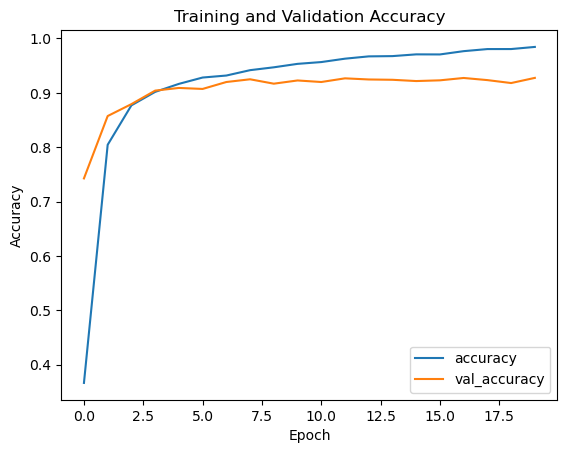

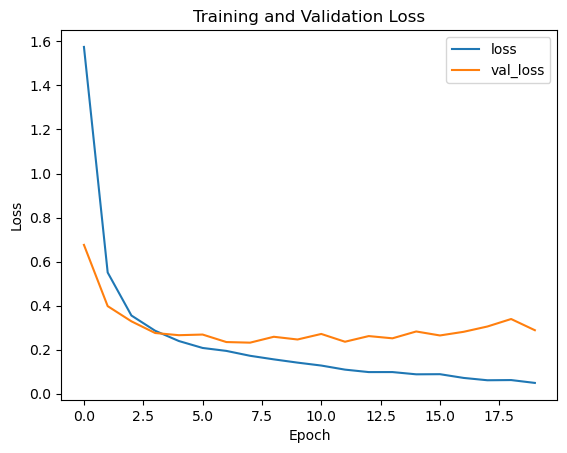

In [12]:
import matplotlib.pyplot as plt

# Візуалізація процесу навчання
plt.plot(history_v2.history['accuracy'], label='accuracy')
plt.plot(history_v2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Візуалізація результатів
plt.plot(history_v2.history['loss'], label='loss')
plt.plot(history_v2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Висновки по частині 2

Згорткова нейромережа, що використовує VGG16 в якості згорткової основи показала кращі результати порівняно з багатошаровою мережею з першого завдання. Точність скалала 92,13% проти 91,49%.

Параметри, використані для отримання результатів:

1. Архітектура моделі: Використання згорткової нейромережі VGG16 як базової моделі з виключенням верхніх шарів.
2. Замороження ваг: Шари VGG16 були заморожені, щоб уникнути їх оновлення під час тренування.
3. Попередня обробка даних: вхідні дані були оброблені функцією preprocess_input з пакету tensorflow.keras.applications.vgg16.
4. Розмір зображень: зображення були змінені до розміру 32*32 за допомогою шару Resizing (хоча було достатньо 32*32, швидкість роботи моделі значно знизилась, але результат був отриманий кращий).
5. Параметри компіляції моделі: були використані оптимізатор Adam з коефіцієнтом навчання 0.001, функція втрат 'categorical_crossentropy', метрика точності.
6. Параметри тренування: тренування проводилося протягом 20 епох з розміром пакету 256 та розділеним навчальним набором на 80% навчання та 20% валідації.